In [1]:
import pandas as pd

path_data = "ikan.csv"

data = pd.read_csv(path_data)
data.head()

,panjang_tubuh,lebar_tubuh,panjang_sirip,lebar_sirip,spesies
0,5.1,3.5,1.4,0.2,Ikan Nila
1,4.9,3.0,1.4,0.2,Ikan Nila
2,4.7,3.2,1.3,0.2,Ikan Nila
3,4.6,3.1,1.5,0.2,Ikan Nila
4,5.0,3.6,1.4,0.2,Ikan Nila


In [2]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   panjang_tubuh  150 non-null    float64
 1   lebar_tubuh    150 non-null    float64
 2   panjang_sirip  150 non-null    float64
 3   lebar_sirip    150 non-null    float64
 4   spesies        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
data.corr(numeric_only=True)

,panjang_tubuh,lebar_tubuh,panjang_sirip,lebar_sirip
panjang_tubuh,1.000000,-0.109369,0.871754,0.817954
lebar_tubuh,-0.109369,1.000000,-0.420516,-0.356544
panjang_sirip,0.871754,-0.420516,1.000000,0.962757
lebar_sirip,0.817954,-0.356544,0.962757,1.000000


In [4]:
data.isnull().sum()


panjang_tubuh    0
lebar_tubuh      0
panjang_sirip    0
lebar_sirip      0
spesies          0
dtype: int64

In [5]:
cekdatanullnya = data[data.isnull().any(axis=1)]
cekdatanullnya

,panjang_tubuh,lebar_tubuh,panjang_sirip,lebar_sirip,spesies


In [6]:
numeric_summary = data.describe()

kategorikal_summary = data.select_dtypes(include='object').describe()

numeric_summary, kategorikal_summary

(       panjang_tubuh  lebar_tubuh  panjang_sirip  lebar_sirip
 count     150.000000   150.000000     150.000000   150.000000
 mean        5.843333     3.054000       3.758667     1.198667
 std         0.828066     0.433594       1.764420     0.763161
 min         4.300000     2.000000       1.000000     0.100000
 25%         5.100000     2.800000       1.600000     0.300000
 50%         5.800000     3.000000       4.350000     1.300000
 75%         6.400000     3.300000       5.100000     1.800000
 max         7.900000     4.400000       6.900000     2.500000,
           spesies
 count         150
 unique          3
 top     Ikan Nila
 freq           50)

In [7]:
data.spesies.unique()


array(['Ikan Nila', 'Ikan Mas', 'Ikan Lele'], dtype=object)

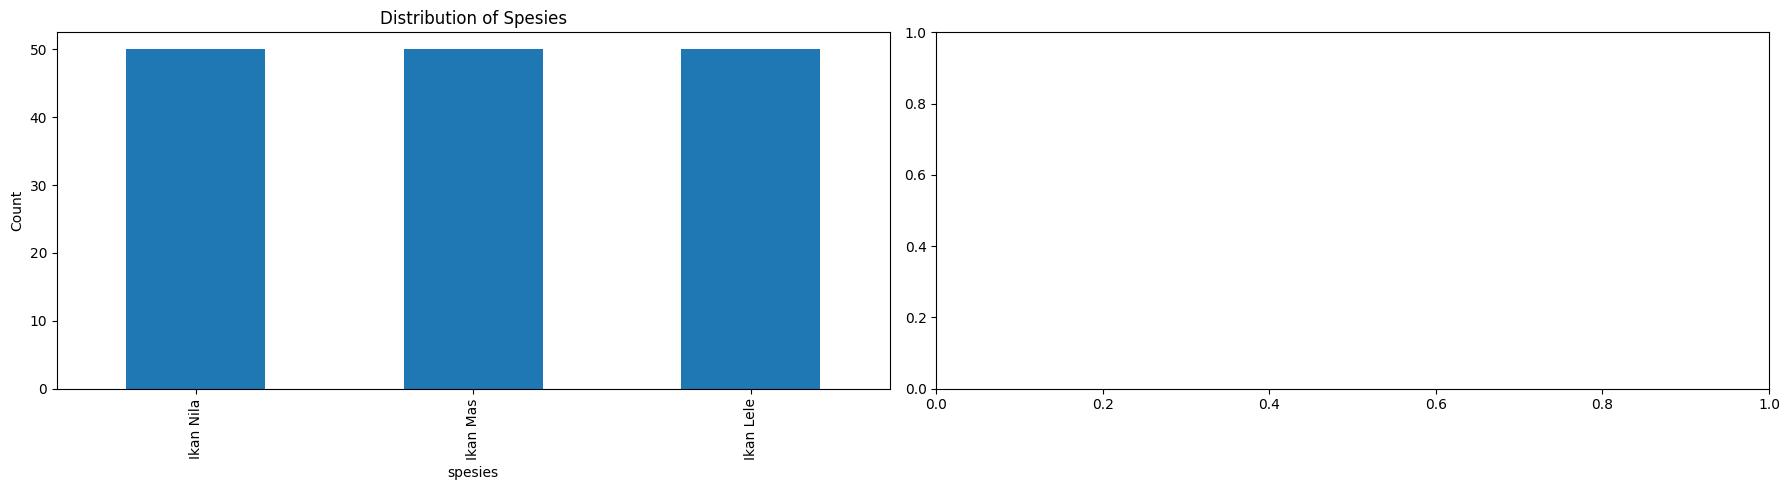

In [8]:
import matplotlib.pyplot as plt

# Distribusi kolom kategorikal
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Species distribution
data['spesies'].value_counts().plot(kind='bar', ax=axes[0], title='Distribution of Spesies')
axes[0].set_ylabel('Count')

plt.tight_layout()
plt.show()

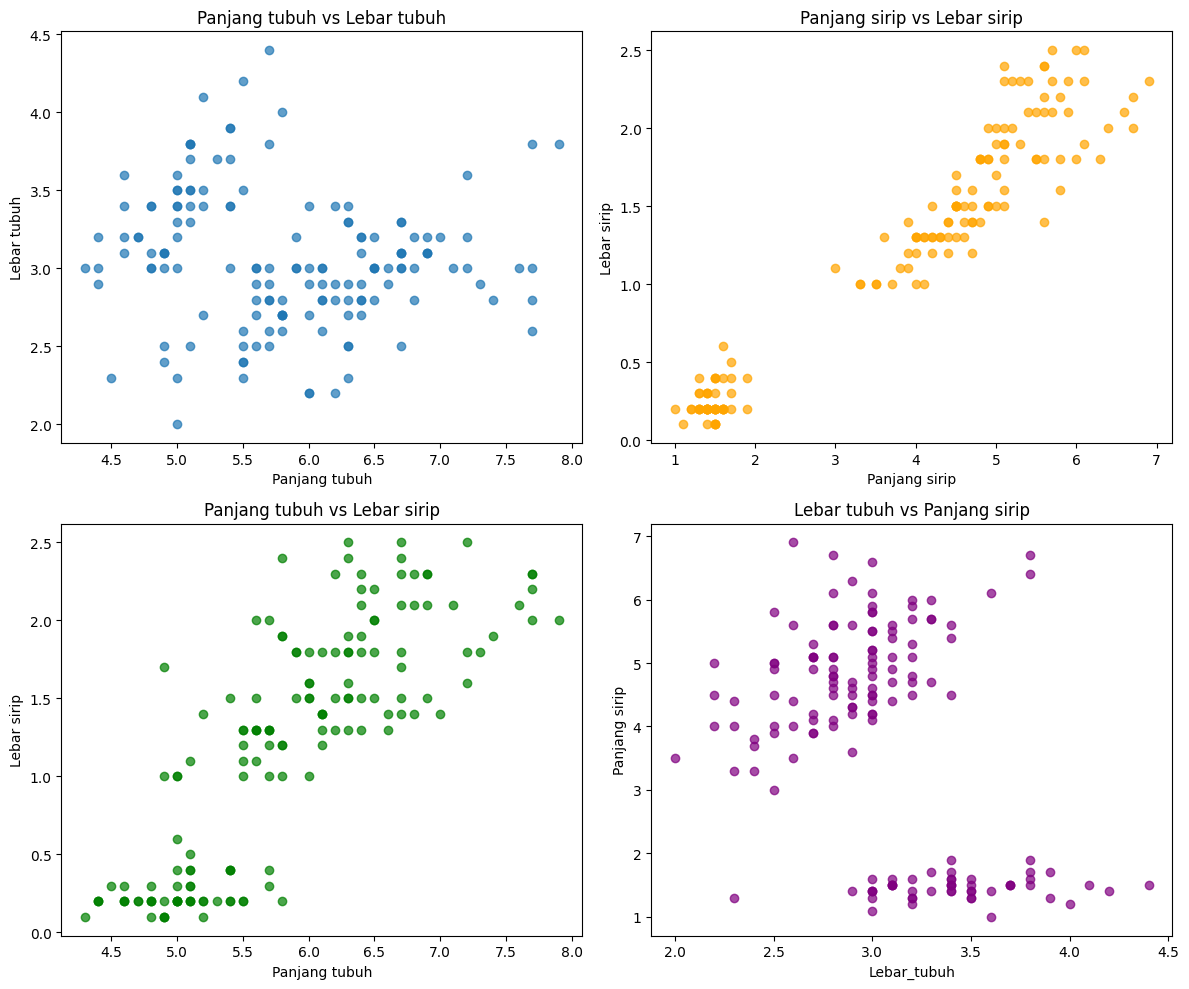

In [9]:
# Scatter plot untuk hubungan antar variabel numerik
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter: culmen length vs culmen depth
axes[0, 0].scatter(data['panjang_tubuh'], data['lebar_tubuh'], alpha=0.7)
axes[0, 0].set_title('Panjang tubuh vs Lebar tubuh')
axes[0, 0].set_xlabel('Panjang tubuh')
axes[0, 0].set_ylabel('Lebar tubuh')

# Scatter: flipper length vs body mass
axes[0, 1].scatter(data['panjang_sirip'], data['lebar_sirip'], alpha=0.7, color='orange')
axes[0, 1].set_title('Panjang sirip vs Lebar sirip')
axes[0, 1].set_xlabel('Panjang sirip')
axes[0, 1].set_ylabel('Lebar sirip')

# Scatter: culmen length vs body mass
axes[1, 0].scatter(data['panjang_tubuh'], data['lebar_sirip'], alpha=0.7, color='green')
axes[1, 0].set_title('Panjang tubuh vs Lebar sirip')
axes[1, 0].set_xlabel('Panjang tubuh')
axes[1, 0].set_ylabel('Lebar sirip')

# Scatter: culmen depth vs flipper length
axes[1, 1].scatter(data['lebar_tubuh'], data['panjang_sirip'], alpha=0.7, color='purple')
axes[1, 1].set_title('Lebar tubuh vs Panjang sirip')
axes[1, 1].set_xlabel('Lebar_tubuh')
axes[1, 1].set_ylabel('Panjang sirip')

plt.tight_layout()
plt.show()

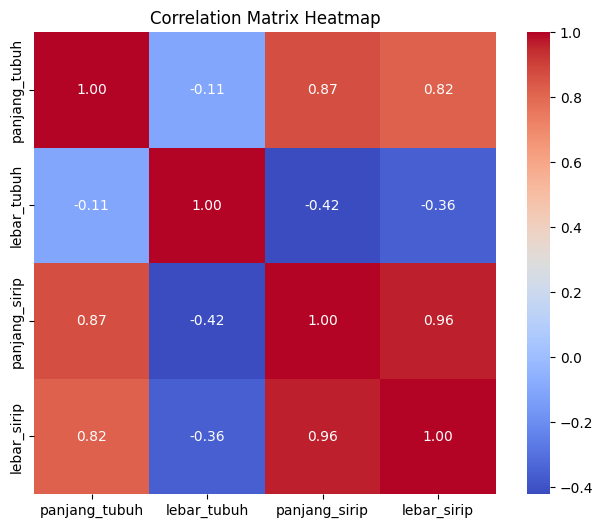

In [10]:
import seaborn as sns

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [11]:
missing_values = data.isnull().sum()

persentase_missing = (missing_values / len(data))  * 100

missing_info = pd.DataFrame({
    'Missing Values' : missing_values,
    'Persentase': persentase_missing
})

In [12]:
missing_info


,Missing Values,Persentase
panjang_tubuh,0,0.0
lebar_tubuh,0,0.0
panjang_sirip,0,0.0
lebar_sirip,0,0.0
spesies,0,0.0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ['spesies']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Menyimpan mapping lama dan baru
for column, le in label_encoders.items():
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Mapping untuk kolom '{column}':")
    print(mapping)
    print()

Mapping untuk kolom 'spesies':
{'Ikan Lele': 0, 'Ikan Mas': 1, 'Ikan Nila': 2}



In [14]:
X = data.drop(columns=['spesies'])
y = data['spesies']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=42)

In [15]:
X_train.head()


,panjang_tubuh,lebar_tubuh,panjang_sirip,lebar_sirip
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [16]:
y_train


22     2
15     2
65     1
11     2
42     2
      ..
71     1
106    0
14     2
92     1
102    0
Name: spesies, Length: 120, dtype: int32

In [17]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

target_kelas = ['Ikan Nila', 'Ikan Mas', 'Ikan Lele']
report_rf = classification_report(
    y_test, y_pred_rf,
    target_names=target_kelas)

print(accuracy_rf)
print(report_rf)

1.0
              precision    recall  f1-score   support

   Ikan Nila       1.00      1.00      1.00        11
    Ikan Mas       1.00      1.00      1.00         9
   Ikan Lele       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [18]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(
    y_test, y_pred_gb,
    target_names=label_encoders['spesies'].classes_)

print(accuracy_gb)
print(report_gb)

1.0
              precision    recall  f1-score   support

   Ikan Lele       1.00      1.00      1.00        11
    Ikan Mas       1.00      1.00      1.00         9
   Ikan Nila       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Figure size 800x600 with 0 Axes>

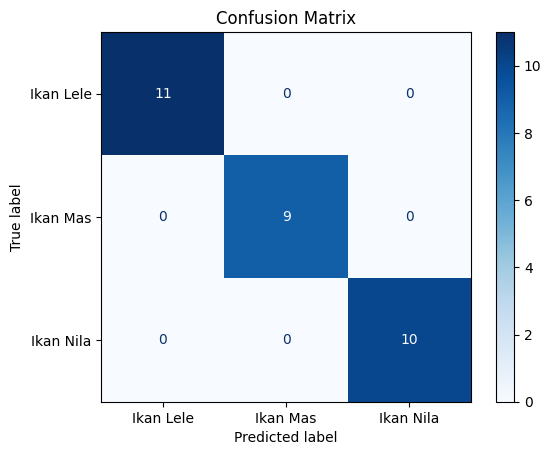

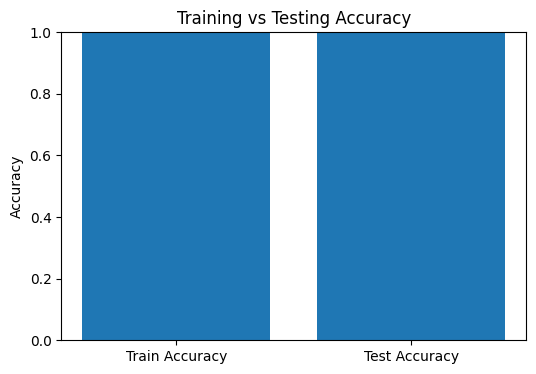

(1.0, 1.0)

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders['spesies'].classes_)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Hitung akurasi pada data latih dan data uji
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)

# Visualisasi akurasi
plt.figure(figsize=(6, 4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.show()

train_accuracy, test_accuracy

In [20]:
import joblib

# Simpan model
joblib.dump(rf_model, 'rf_model.joblib')
# Simpan label encoder
joblib.dump(label_encoders, 'label_encoder.pkl')
print("Label Encoder dan Model berhasil disimpan!")

Label Encoder dan Model berhasil disimpan!
